In [90]:
#Import libraries
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from collections import Counter
import matplotlib.pyplot as plt

In [95]:
#Read spambase.data into pandas dataframe
df = pd.read_csv('spambase.data',header = None)

spam_df = df[(df[57] == 1)] #select the rows that are spam
spam_df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,0.00,0.00,0.00,0.0,0.00,0.23,0.00,0.00,0.00,0.00,...,0.077,0.038,0.000,0.000,0.000,0.038,2.600,42,182,1
1809,0.39,0.00,0.00,0.0,0.00,0.39,0.79,0.00,0.00,0.39,...,0.000,0.064,0.000,0.640,0.192,0.000,2.740,13,74,1
1810,0.00,0.00,0.77,0.0,0.38,0.38,0.38,0.00,0.00,0.77,...,0.063,0.127,0.255,0.510,0.000,0.000,3.685,62,258,1
1811,0.00,0.00,0.00,0.0,0.53,0.00,0.53,0.00,0.53,0.00,...,0.000,0.000,0.000,0.082,0.000,0.000,4.391,66,101,1


In [96]:
# create discretizer
kbins = KBinsDiscretizer(n_bins=2, strategy='uniform', encode='ordinal')

In [97]:
#Remove outliers using 3 standard deviations away from the mean to differentiate outlier from non-outlier
def remove_outliers(spam_df,columns,n_std):
    for column in columns:
        mean = spam_df[column].mean()
        sd = spam_df[column].std()
        spam_df = spam_df[(spam_df[column] <= mean+(n_std*sd))]
    return df

spam_df[(np.abs(stats.zscore(spam_df)) < 0.1).all(axis=1)]
spam_df = remove_outliers(spam_df, spam_df.columns, 3)
spam_df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


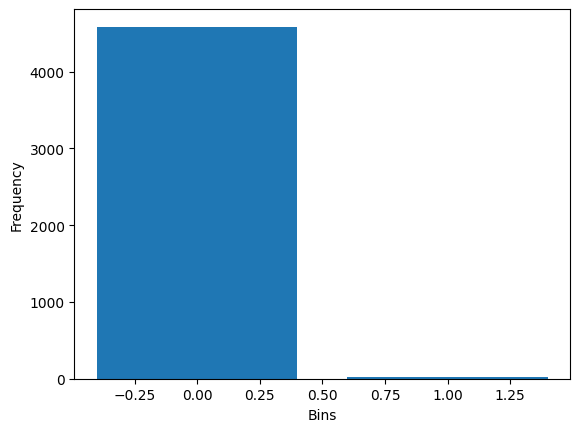

Bin 0: 0.0 -> 2.27
Bin 1: 2.27 -> 4.54


In [100]:
#Visualizes the number of observations in each bin
def plot_bins(values):
    counter = Counter(values)
    plt.bar(counter.keys(), counter.values())
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.show()

def show_bins(bins):
    for i in range(len(bins)-1):
        print(f'Bin {i}: {str(bins[i])} -> {str(bins[i+1])}')

att = spam_df.iloc[:, 0:1]
att_bin = kbins.fit_transform(np.array(att).reshape(-1,1))
# show results
plot_bins(Counter(list(att_bin.flatten())))
show_bins(kbins.bin_edges_[0])

In [101]:
# Equal-Width Discretization implementation
frames = []
for i in range(0,57):
    bin = kbins.fit_transform(np.array(spam_df.iloc[:, i:i + 1]).reshape(-1,1))
    frames.append(pd.DataFrame(bin, columns=[str(i)]))

data = pd.concat(frames, axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
#Quick check to know how many columns contain same values all through
for k in range(0,57):
    print(str(k) + " " + str(len(data[(data[str(k)] == 1)])))

0 16
1 36
2 32
3 5
4 13
5 4
6 6
7 3
8 3
9 2
10 26
11 22
12 4
13 3
14 18
15 5
16 12
17 8
18 12
19 1
20 32
21 30
22 11
23 7
24 26
25 6
26 100
27 11
28 7
29 37
30 1
31 23
32 1
33 23
34 1
35 15
36 11
37 3
38 4
39 23
40 11
41 14
42 12
43 4
44 6
45 4
46 5
47 3
48 15
49 2
50 3
51 2
52 7
53 2
54 5
55 1
56 5


In [85]:
#Algorithm 4.1 & 4.2 implementation
def LGG(firstrow,row):
    index = 0
    for x,y in zip(list(firstrow),list(row)):
        if x !=y:
            firstrow[index]=-1
        index = index+1
    return firstrow

def LGGSET(data):
   firstrow=data.iloc[0:1,:]
   for index, row in data.iterrows():
       if index==0:
           firstrow=row
       else:
            firstrow = LGG(firstrow,row)

   return firstrow

spamrow=LGGSET(data)
print(spamrow)

0    -1.0
1    -1.0
2    -1.0
3    -1.0
4    -1.0
5    -1.0
6    -1.0
7    -1.0
8    -1.0
9    -1.0
10   -1.0
11   -1.0
12   -1.0
13   -1.0
14   -1.0
15   -1.0
16   -1.0
17   -1.0
18   -1.0
19   -1.0
20   -1.0
21   -1.0
22   -1.0
23   -1.0
24   -1.0
25   -1.0
26    0.0
27   -1.0
28   -1.0
29   -1.0
30    0.0
31    0.0
32   -1.0
33   -1.0
34   -1.0
35   -1.0
36   -1.0
37   -1.0
38   -1.0
39   -1.0
40    0.0
41   -1.0
42   -1.0
43   -1.0
44   -1.0
45   -1.0
46   -1.0
47    0.0
48   -1.0
49   -1.0
50   -1.0
51   -1.0
52   -1.0
53   -1.0
54   -1.0
55   -1.0
56   -1.0
Name: 0, dtype: float64


In [110]:
#Calculating the accuracy of the model
def test_LGGSET(spamrow,dataset):
   tp=0
   fp=0
   tn=0
   fn=0
   copy_spam_row = spamrow.copy(deep=True)

   for index, row in dataset.iterrows():
            validate_rows = LGG(copy_spam_row,row)
            potential_spam=1
            for x,y in zip(list(validate_rows),list(spamrow)):
                 if x != y:
                     potential_spam=0
                     break
            spam_result=df.iloc[index,57]
            if spam_result == 1 and potential_spam == 1:
                tp=tp+1
            elif spam_result == 0 and potential_spam == 1:
                fp=fp+1
            elif spam_result == 0 and potential_spam == 0:
                tn=tn+1
            elif spam_result == 1 and potential_spam == 0:
                fn=fn+1
            copy_spam_row = spamrow.copy(deep=True)


   print("True Positives TP " + str(tp))
   print("False Positives FP " + str(fp))
   print("True Negatives TN " + str(tn))
   print("False Negatives FN " + str(fn))
   print("True positive rate, TPR " + str(tp/(tp + fn)))
   print("False positive rate (false alarm rate), FPR " + str(fp/(fp + tn)))


In [107]:
# Equal-Width Discretization of the entire dataset for test
frames = []
for i in range(0,57):
    bin = kbins.fit_transform(np.array(df.iloc[:, i:i + 1]).reshape(-1,1))
    frames.append(pd.DataFrame(bin, columns=[str(i)]))

dataset = pd.concat(frames, axis=1)
dataset

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
test_LGGSET(spamrow,dataset)

True Positives TP 1813
False Positives FP 2650
True Negatives TN 138
False Negatives FN 0
True positive rate, TPR 1.0
False positive rate (false alarm rate), FPR 0.9505021520803444
